# Analysis of IPO companies that have potential to make profitable returns

---

## Imported Libraries
---

In [664]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance

%matplotlib inline

## Imported IPO CSV dataset
---

In [665]:
ipo_data = pd.read_csv('./Dataset/IPO_Dataset.csv', encoding='latin1', low_memory=False)

In [666]:
# Number of rows and columns in dataset
print(f'Rows: {ipo_data.shape[0]}, Columns: {ipo_data.shape[1]}')

Rows: 3762, Columns: 1664


## Removed duplicates
---

In [667]:
# Checked for duplicates
ipo_data['Symbol'].value_counts(ascending=False)

Symbol
MITT    64
NWFL     1
NWS      1
NWSA     1
NWY      1
        ..
FEX      1
FEYE     1
FF       1
FFA      1
ZYNE     1
Name: count, Length: 3699, dtype: int64

In [668]:
# Dropped duplicates
ipo_data = ipo_data.drop_duplicates(subset=['Symbol'])

# Checked for duplicates
ipo_data['Symbol'].value_counts(ascending=False)

Symbol
A       1
NWFL    1
NWS     1
NWSA    1
NWY     1
       ..
FEX     1
FEYE    1
FF      1
FFA     1
ZYNE    1
Name: count, Length: 3699, dtype: int64

## Dropped unnecessary columns
---

In [669]:
# Removed spaces in the column titles
ipo_data.columns = ipo_data.columns.str.strip()
ipo_data.head()

,Symbol,DaysBetterThanSP,daysProfit,daysProfitGrouped,exactDiffernce,Year,Month,Day,dayOfWeek,closeDay0,...,usableCEOAge,usableCEOGender,usablePresidentAge,usablePresidentGender,FoundingDateGrouped,yearDifferenceGrouped,Profitable,Safe,HomeRunDay,HomeRun
0,A,122,249,200+,NaN,1999,11,18,3,28.6358,...,Blank,Blank,Blank,Blank,1951 - 2000,Unknown,1,0,77.0,1
1,AAC,131,262,200+,232.0,2014,10,2,3,18.5000,...,40 - 49,male,Blank,Blank,2011 - present,Unknown,1,1,NaN,0
2,AAOI,125,262,200+,6054.0,2013,9,26,3,9.9600,...,Blank,Blank,Blank,Blank,1951 - 2000,Unknown,1,0,NaN,0
3,AAP,128,261,200+,NaN,2001,11,29,3,13.9000,...,Blank,Blank,Blank,Blank,1901 - 1950,Unknown,1,0,NaN,0
4,AAT,123,127,100 - 149,181.0,2011,1,13,3,21.2500,...,Blank,Blank,Blank,Blank,2001 - 2010,Unknown,0,0,NaN,0


In [670]:
# Checked what range of index number to target, to choose which column could be dropped
print(ipo_data.columns[10:13])
print(ipo_data.columns[14:39])
print(ipo_data.columns[40:43])
print(ipo_data.columns[44:154])
print(ipo_data.columns[155:158])
print(ipo_data.columns[159:304])
print(ipo_data.columns[305:308])
print(ipo_data.columns[309:454])
print(ipo_data.columns[455:458])
print(ipo_data.columns[459:904])
print(ipo_data.columns[905:908])
print(ipo_data.columns[909:908])
print(ipo_data.columns[1315:1318])
print(ipo_data.columns[1344:1647])
print(ipo_data.columns[1651:1664])

Index(['highDay0', 'openDay0', 'lowDay0'], dtype='object')
Index(['closeDay1', 'highDay1', 'openDay1', 'lowDay1', 'volumeDay1',
       'closeDay2', 'highDay2', 'openDay2', 'lowDay2', 'volumeDay2',
       'closeDay3', 'highDay3', 'openDay3', 'lowDay3', 'volumeDay3',
       'closeDay4', 'highDay4', 'openDay4', 'lowDay4', 'volumeDay4',
       'closeDay5', 'highDay5', 'openDay5', 'lowDay5', 'volumeDay5'],
      dtype='object')
Index(['highDay6', 'openDay6', 'lowDay6'], dtype='object')
Index(['closeDay7', 'highDay7', 'openDay7', 'lowDay7', 'volumeDay7',
       'closeDay8', 'highDay8', 'openDay8', 'lowDay8', 'volumeDay8',
       ...
       'closeDay27', 'highDay27', 'openDay27', 'lowDay27', 'volumeDay27',
       'closeDay28', 'highDay28', 'openDay28', 'lowDay28', 'volumeDay28'],
      dtype='object', length=110)
Index(['highDay29', 'openDay29', 'lowDay29'], dtype='object')
Index(['closeDay30', 'highDay30', 'openDay30', 'lowDay30', 'volumeDay30',
       'closeDay31', 'highDay31', 'openDay31',

In [671]:
# Dropped columns by index ranges
dropped_columns = (list(ipo_data.columns[10:13]) + list(ipo_data.columns[14:39]) + list(ipo_data.columns[40:43]) + list(ipo_data.columns[44:154]) 
                 + list(ipo_data.columns[155:158]) + list(ipo_data.columns[159:304]) + list(ipo_data.columns[305:308])+ list(ipo_data.columns[309:454])
                 + list(ipo_data.columns[455:458]) + list(ipo_data.columns[459:904]) + list(ipo_data.columns[905:908]) + list(ipo_data.columns[909:1314])
                 + list(ipo_data.columns[1315:1318]) + list(ipo_data.columns[1344:1647]) + list(ipo_data.columns[1650:1664]))
ipo_data.drop(columns= dropped_columns, inplace= True)

# Checked columns
ipo_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3699 entries, 0 to 3761
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Symbol                      3699 non-null   object 
 1   DaysBetterThanSP            3699 non-null   int64  
 2   daysProfit                  3699 non-null   int64  
 3   daysProfitGrouped           3699 non-null   object 
 4   exactDiffernce              1568 non-null   float64
 5   Year                        3699 non-null   int64  
 6   Month                       3699 non-null   int64  
 7   Day                         3699 non-null   int64  
 8   dayOfWeek                   3699 non-null   int64  
 9   closeDay0                   3699 non-null   float64
 10  volumeDay0                  3686 non-null   float64
 11  closeDay6                   3696 non-null   float64
 12  volumeDay6                  3683 non-null   float64
 13  closeDay29                  3672 non-n

In [672]:
# Dropped more columns
ipo_data = ipo_data.drop(columns = ['exactDiffernce', 'LastSale', 'ADR TSO', 'Industry', 'Summary Quote', 'City', 'FiscalDateEnd', 'lastFiscalYearGrowth'])
dropped_columns2 = list(ipo_data.columns[26:30]) + list(ipo_data.columns[31:35])
ipo_data.drop(columns= dropped_columns2, inplace= True)

## Checked for nulls
---

In [673]:
# Checked for nulls
ipo_data.isnull().sum().sort_values(ascending=False)

volumeDay261                  1115
closeDay261                   1107
presidentInChargeDuringIPO    1093
Revenue                       1093
netIncome                      881
stateCountry                   877
employees                      876
CEOInChargeDuringIPO           855
Sector                         653
volumeDay179                   181
closeDay179                    168
volumeDay89                     84
closeDay89                      71
volumeDay59                     65
closeDay59                      52
volumeDay29                     40
closeDay29                      27
volumeDay6                      16
volumeDay0                      13
closeDay6                        3
MarketMonthTrend                 0
Market3MonthTrend                0
ipoDate                          0
Symbol                           0
MarketCap                        0
Name                             0
DaysBetterThanSP                 0
closeDay0                        0
dayOfWeek           

In [674]:
# Dropped all rows with nulls
ipo_data.dropna(inplace=True)

# Checked for nulls
ipo_data.isnull().any()

Symbol                        False
DaysBetterThanSP              False
daysProfit                    False
daysProfitGrouped             False
Year                          False
Month                         False
Day                           False
dayOfWeek                     False
closeDay0                     False
volumeDay0                    False
closeDay6                     False
volumeDay6                    False
closeDay29                    False
volumeDay29                   False
closeDay59                    False
volumeDay59                   False
closeDay89                    False
volumeDay89                   False
closeDay179                   False
volumeDay179                  False
closeDay261                   False
volumeDay261                  False
Name                          False
MarketCap                     False
Sector                        False
ipoDate                       False
CEOInChargeDuringIPO          False
presidentInChargeDuringIPO  

## Creation of metric columns
---

In [675]:
# New column Profit Ratio was calculated by dividing closeDay261 by CloseDay0
ipo_data['Profit_Ratio'] = ipo_data['closeDay261'] / ipo_data['closeDay0']

# New Column Profitable was calculated by checking if Profit Ratio > 1
ipo_data['Profitable'] = ipo_data['Profit_Ratio'] > 1

In [676]:
# Checked for number of rows and columns
print(f'Rows: {ipo_data.shape[0]}, Columns: {ipo_data.shape[1]}')

Rows: 1443, Columns: 37


## Data type configuration 
---

In [677]:
# Checked for data type
ipo_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1443 entries, 0 to 3755
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Symbol                      1443 non-null   object 
 1   DaysBetterThanSP            1443 non-null   int64  
 2   daysProfit                  1443 non-null   int64  
 3   daysProfitGrouped           1443 non-null   object 
 4   Year                        1443 non-null   int64  
 5   Month                       1443 non-null   int64  
 6   Day                         1443 non-null   int64  
 7   dayOfWeek                   1443 non-null   int64  
 8   closeDay0                   1443 non-null   float64
 9   volumeDay0                  1443 non-null   float64
 10  closeDay6                   1443 non-null   float64
 11  volumeDay6                  1443 non-null   float64
 12  closeDay29                  1443 non-null   float64
 13  volumeDay29                 1443 non-n

In [678]:
# Checked for value counts in 'employees' column
ipo_data['employees'].value_counts()

employees
-        81
103       6
7000      6
1800      6
56        6
         ..
863       1
50000     1
387       1
1426      1
2060      1
Name: count, Length: 968, dtype: int64

In [679]:
# Changed all '-' with 0 in 'Employees' column
temp_employee = ipo_data['employees'].str.contains('-')
ipo_data.loc[temp_employee, 'employees'] = 0

# Changed their data type to integer
ipo_data['employees'] = ipo_data['employees'].astype(int)

# Made a new table: the average of employees grouped by sector
mean_employee_sector = ipo_data.groupby('Sector')['employees'].median()

In [680]:
# Merged ipo_data and mean_employee_sector table
ipo_data = pd.merge(ipo_data, mean_employee_sector, how='inner', on='Sector')

In [681]:
ipo_data.head()

,Symbol,DaysBetterThanSP,daysProfit,daysProfitGrouped,Year,Month,Day,dayOfWeek,closeDay0,volumeDay0,...,stateCountry,Revenue,netIncome,employees_x,MarketMonthTrend,Market3MonthTrend,Market6MonthTrend,Profit_Ratio,Profitable,employees_y
0,A,122,249,200+,1999,11,18,3,28.6358,59753154.0,...,CA,4.470000e+09,684000000.0,13500,1.601165,2.352508,2.312974,1.114706,True,2280.5
1,AAC,131,262,200+,2014,10,2,3,18.5000,2799073.0,...,TN,3.176400e+08,-20580000.0,2100,-2.452645,-1.194498,0.138536,1.320541,True,166.5
2,AAOI,125,262,200+,2013,9,26,3,9.9600,948999.0,...,TX,3.823300e+08,73950000.0,3054,0.761732,0.926398,1.286165,1.687751,True,1500.0
3,AAP,128,261,200+,2001,11,29,3,13.9000,371100.0,...,VA,9.370000e+09,475510000.0,71000,0.613550,1.153716,-0.128110,1.236187,True,1583.5
4,AAT,123,127,100 - 149,2011,1,13,3,21.2500,15536889.0,...,CA,3.116800e+08,29080000.0,194,1.692499,1.824305,1.813736,0.973647,False,1583.5


In [682]:
# Replaced all employees_x with a value of 0 to the values from employees_y
temp_employee  = ipo_data['employees_x'] == 0
ipo_data.loc[temp_employee, 'employees_x'] = ipo_data.loc[temp_employee, 'employees_y']

/var/folders/bv/9kp7wlwx1n94x819spyh3pzc0000gn/T/ipykernel_12113/1108303369.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1624.  1281.5 1281.5 1583.5 1500.  1583.5 1583.5  515.  1583.5 1500.
 1624.  1500.  3900.   515.   650.  1624.   650.  1500.  1500.  2280.5
  166.5 1500.   515.  1500.  1583.5  650.  1624.  1281.5 1281.5  820.
 1624.   820.   166.5 1583.5 1583.5 1583.5 1583.5 1583.5 1624.  1624.
 1624.   650.   166.5 2280.5 2057.  1500.  2280.5 1500.   515.   166.5
 1583.5  650.   820.   820.   650.  1583.5 1583.5 1624.  1583.5 1624.
  515.  1500.  1281.5 1583.5 1583.5  650.  1500.  1500.  1500.  1624.
 1583.5 1281.5 1281.5  515.  1281.5  650.   650.  1500.  1281.5 1624.
  820. ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  ipo_data.loc[temp_employee, 'employees_x'] = ipo_data.loc[temp_employee, 'employees_y']


In [683]:
# Dropped column 'employee_y'
ipo_data = ipo_data.drop(columns = ['employees_y'])

# Changed type to int
ipo_data['employees_x'] = ipo_data['employees_x'].astype(int)

In [684]:
# Changed ipoDate to a DateTime format
ipo_data['ipoDate'] = pd.to_datetime(ipo_data['ipoDate'], format='mixed')

In [685]:
# Using a for loop, converted rows with 'Yes' or 'No' or 'sameYear' with 1 and 0 using mapping
converted_columns = ['CEOInChargeDuringIPO', 'presidentInChargeDuringIPO']

for b in converted_columns:
    ipo_data[b] = ipo_data[b].map({'Yes': 1, 'No': 0, 'sameYear': 0})

In [686]:
# Replaced all string length of 2 in 'stateCountry' column to 'USA'
tempcountry = ipo_data['stateCountry'].str.strip().str.len() == 2
ipo_data.loc[tempcountry, 'stateCountry'] = 'USA'

In [687]:
# Checked all types are in its right form
ipo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1443 entries, 0 to 1442
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Symbol                      1443 non-null   object        
 1   DaysBetterThanSP            1443 non-null   int64         
 2   daysProfit                  1443 non-null   int64         
 3   daysProfitGrouped           1443 non-null   object        
 4   Year                        1443 non-null   int64         
 5   Month                       1443 non-null   int64         
 6   Day                         1443 non-null   int64         
 7   dayOfWeek                   1443 non-null   int64         
 8   closeDay0                   1443 non-null   float64       
 9   volumeDay0                  1443 non-null   float64       
 10  closeDay6                   1443 non-null   float64       
 11  volumeDay6                  1443 non-null   float64     

In [688]:
# Filter for companies with a 250 million dollar valuation
ipo_data = ipo_data[(ipo_data['MarketCap'] > 250_000_000)]

In [689]:
# Made Revenue into per million($)
ipo_data['Revenue'] = ipo_data['Revenue'] / 1_000_000

## Removing Outliers
---

In [690]:
# Calculated the lower and upper quantile threshold and remove outliers
qr = []

col_list = ipo_data.columns[[1, 2, 4, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 29, 30, 31, 32, 33, 34]]

for x in col_list:
    col_num = ipo_data[x]
    iqr_calculation = iqr(col_num)
    lower_threshold = np.quantile(col_num, 0.25) - 1.5 * iqr_calculation
    upper_threshold = np.quantile(col_num, 0.75) + 1.5 * iqr_calculation
    qr.append((x, lower_threshold, upper_threshold))

for column, lower, upper in qr:
    ipo_data =ipo_data[(ipo_data[column] >= lower) & (ipo_data[column] <= upper)]

In [691]:
# Checked how many rows and columns
print(f'Rows: {ipo_data.shape[0]}, Columns: {ipo_data.shape[1]}')

Rows: 485, Columns: 37


array([[<Axes: title={'center': 'DaysBetterThanSP'}>,
        <Axes: title={'center': 'daysProfit'}>,
        <Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Day'}>,
        <Axes: title={'center': 'dayOfWeek'}>],
       [<Axes: title={'center': 'closeDay0'}>,
        <Axes: title={'center': 'volumeDay0'}>,
        <Axes: title={'center': 'closeDay6'}>,
        <Axes: title={'center': 'volumeDay6'}>,
        <Axes: title={'center': 'closeDay29'}>,
        <Axes: title={'center': 'volumeDay29'}>],
       [<Axes: title={'center': 'closeDay59'}>,
        <Axes: title={'center': 'volumeDay59'}>,
        <Axes: title={'center': 'closeDay89'}>,
        <Axes: title={'center': 'volumeDay89'}>,
        <Axes: title={'center': 'closeDay179'}>,
        <Axes: title={'center': 'volumeDay179'}>],
       [<Axes: title={'center': 'closeDay261'}>,
        <Axes: title={'center': 'volumeDay261'}>,
        <Axes: title={'center': 'MarketCap'

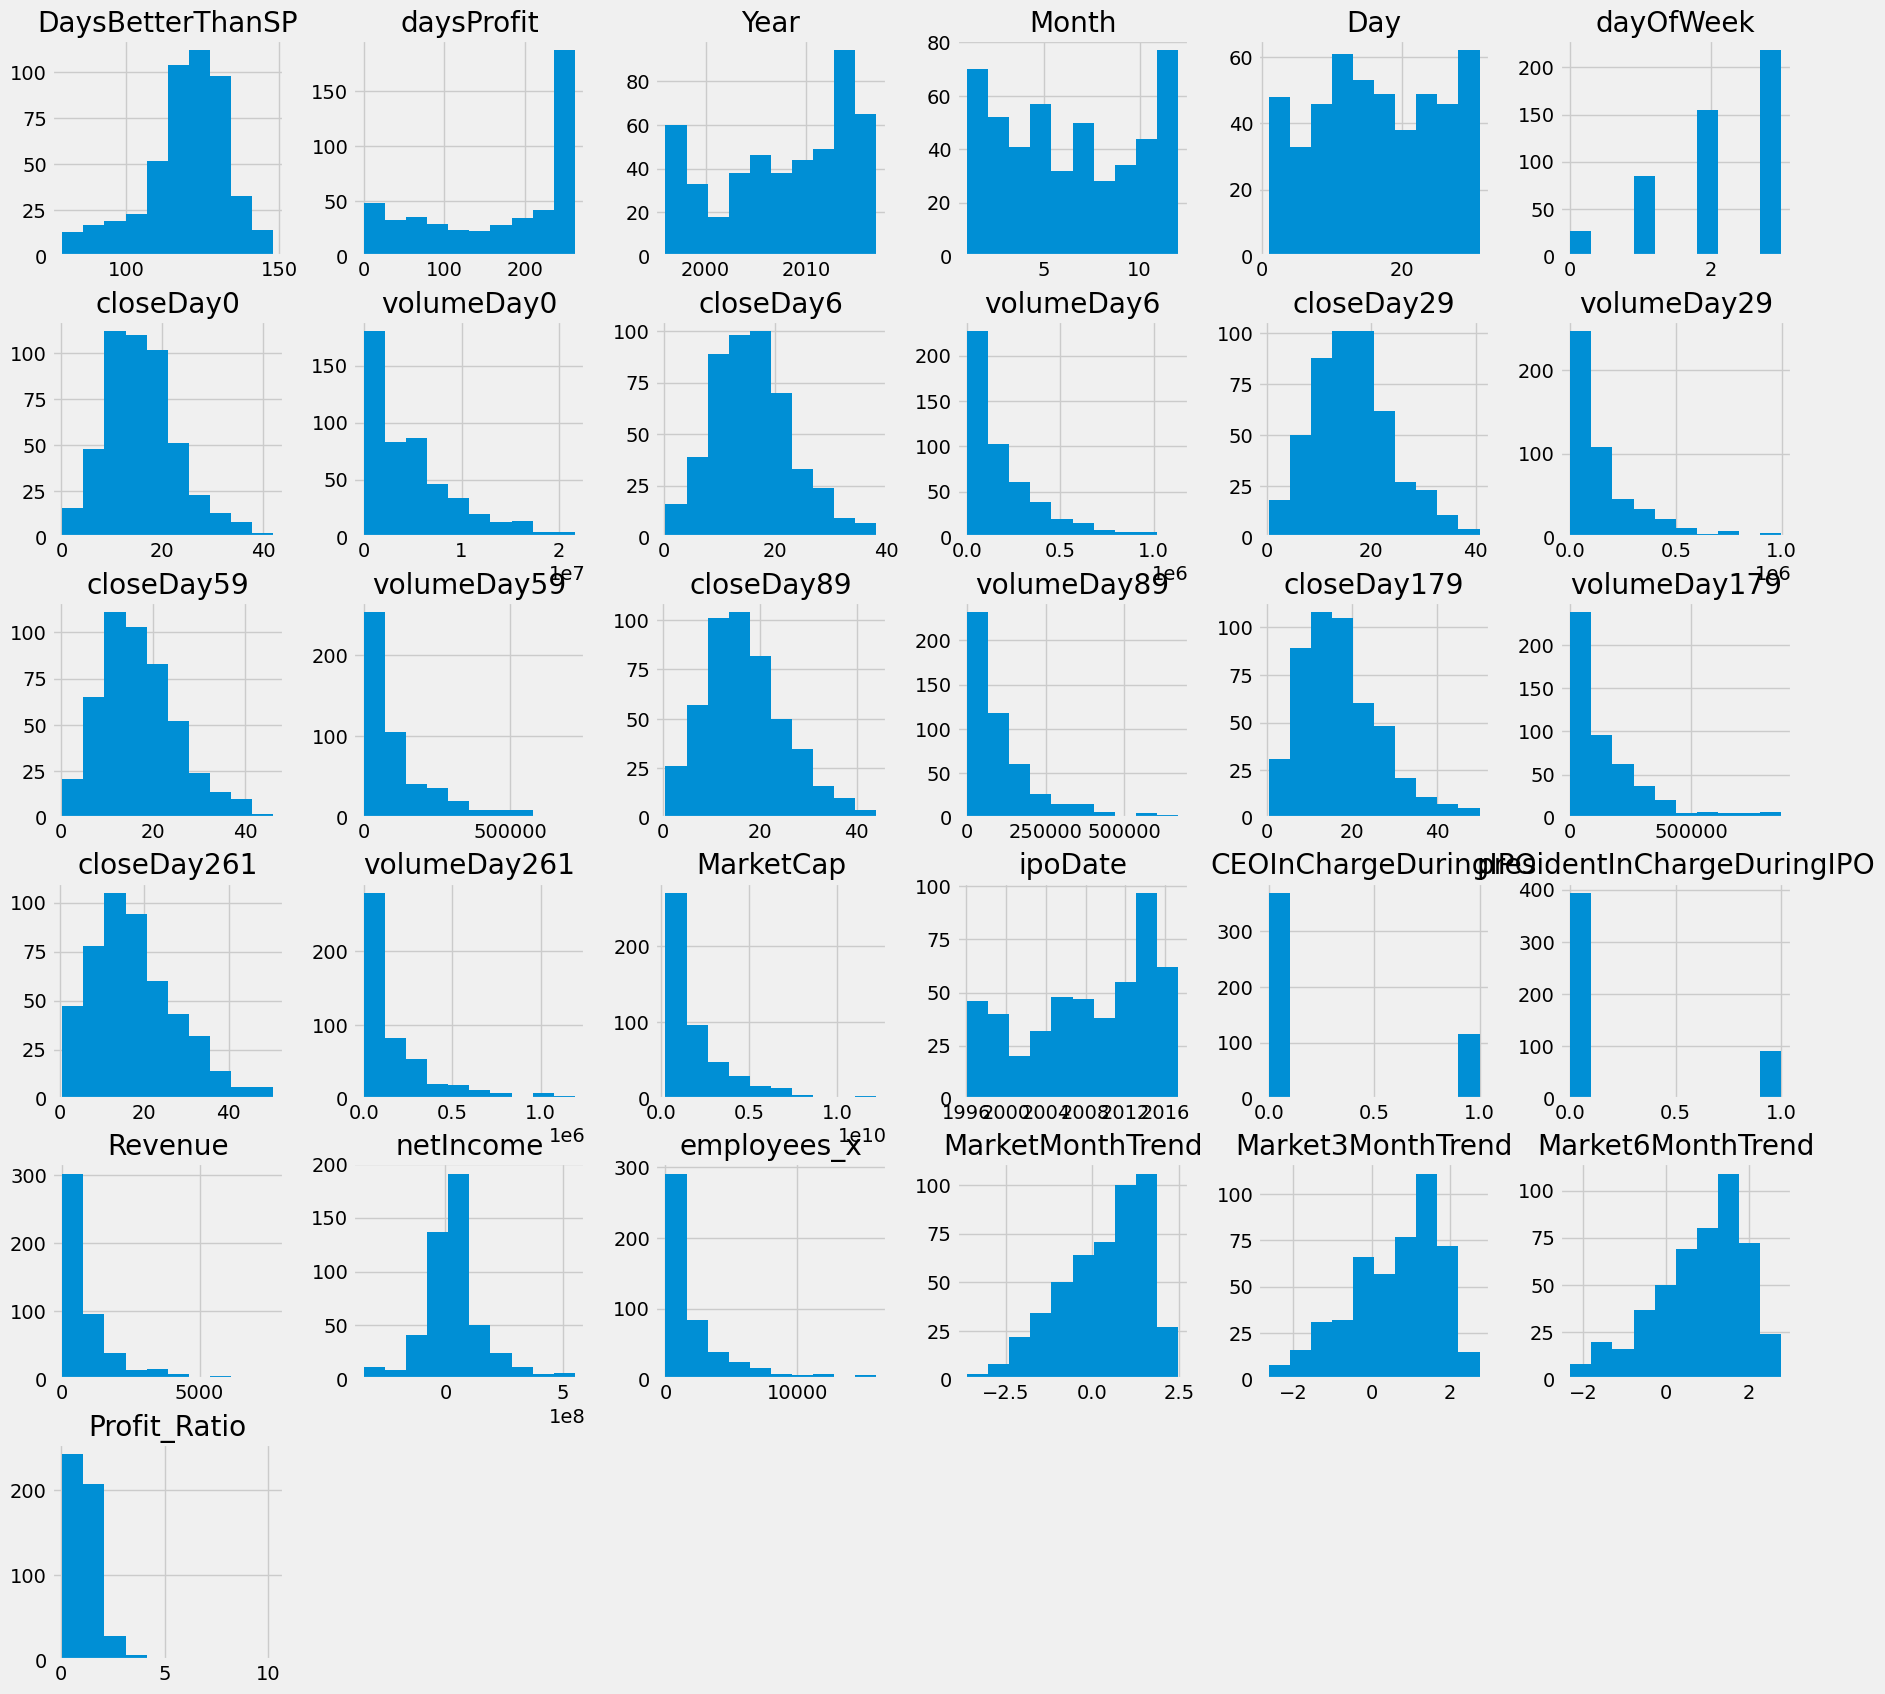

In [692]:
# Histogram plotted
ipo_data.hist(figsize= (20,20))

## Saved to CSV
---

In [693]:
# Saved to CSV
ipo_data.to_csv('ipo_data_cleaned.csv', index=False)

## Checked for correlation and value counts
---

In [694]:
# Calculated the value of count for each of the categorical columns
sector_count = ipo_data['Sector'].value_counts()
statecountry_count = ipo_data['stateCountry'].value_counts()
pic_count = ipo_data['presidentInChargeDuringIPO'].value_counts()
cic_count = ipo_data['CEOInChargeDuringIPO'].value_counts()
dpg_count = ipo_data['daysProfitGrouped'].value_counts()
month_count = ipo_data['Month'].value_counts()
day_count = ipo_data['Day'].value_counts()
dow_count = ipo_data['dayOfWeek'].value_counts()
print(sector_count, statecountry_count)

Sector
Health Care              91
Consumer Services        85
Finance                  84
Technology               64
Basic Industries         30
Energy                   29
Capital Goods            27
Public Utilities         20
Consumer Non-Durables    16
Miscellaneous            16
Consumer Durables        14
Transportation            9
Name: count, dtype: int64 stateCountry
USA                    436
 Canada                 13
 Bermuda                10
 Israel                  9
 China                   4
 the United Kingdom      3
 Switzerland             2
 Denmark                 1
 France                  1
 The Netherlands         1
 Peru                    1
 Ireland                 1
 Monaco                  1
 US Virgin Islands       1
 Greece                  1
Name: count, dtype: int64


In [695]:
print(pic_count, cic_count, dpg_count)

presidentInChargeDuringIPO
0    394
1     91
Name: count, dtype: int64 CEOInChargeDuringIPO
0    369
1    116
Name: count, dtype: int64 daysProfitGrouped
200+         241
0 - 49        76
50 - 99       63
150 - 200     60
100 - 149     45
Name: count, dtype: int64


In [696]:
print(month_count, day_count, dow_count)

Month
5     57
3     52
7     50
11    48
10    44
4     41
2     40
9     34
6     32
1     30
12    29
8     28
Name: count, dtype: int64 Day
12    24
11    23
29    21
15    20
16    20
28    20
25    20
24    20
2     20
13    19
8     19
3     18
9     17
6     16
22    16
17    15
27    15
20    15
14    14
18    14
10    14
23    13
19    12
5     12
26    11
30    11
21    11
7     10
31    10
1     10
4      5
Name: count, dtype: int64 dayOfWeek
3    218
2    155
1     85
0     27
Name: count, dtype: int64


In [697]:
# Created 1 hot encoding for 'Sector' & 'Month'
ipo_data = pd.get_dummies(ipo_data, columns=['Sector'], drop_first= True)
ipo_data = pd.get_dummies(ipo_data, columns=['Month'], drop_first= True)

In [698]:
# Calculated correlation in respect to Profitable column
Correlations = ipo_data.corr(numeric_only=True)['Profitable'].sort_values(ascending=False)
print(Correlations)

Profitable                      1.000000
daysProfit                      0.704692
Profit_Ratio                    0.546951
closeDay261                     0.481725
DaysBetterThanSP                0.349080
closeDay179                     0.299088
netIncome                       0.139873
Year                            0.103277
MarketCap                       0.102705
employees_x                     0.100750
Sector_Finance                  0.086380
closeDay89                      0.084266
volumeDay261                    0.071518
Month_5                         0.064211
Month_8                         0.058736
CEOInChargeDuringIPO            0.055590
Sector_Energy                   0.047173
Month_9                         0.043977
closeDay59                      0.043785
Sector_Public Utilities         0.043170
Sector_Consumer Durables        0.040911
Revenue                         0.035045
Sector_Miscellaneous            0.033738
Month_6                         0.031609
volumeDay179    

## All features chosen
---

* daysProfit
* DaysBetterThanSP
* closeDay179
* netIncome
* Year
* MarketCap
* employees_x
* closeDay6
* Market3MonthTrend
* volumeDay0
* Market6MonthTrend
* MarketMonthTrend
* closeDay0

In [699]:
feature_cols = ['daysProfit', 'DaysBetterThanSP', 'closeDay179', 'netIncome', 'Year', 'MarketCap', 'employees_x', 'closeDay6', 'Market3MonthTrend', 'volumeDay0', 'Market6MonthTrend', 
                'MarketMonthTrend', 'closeDay0']

## Loaded data into a test split and scaler transformation
---

In [700]:
X = ipo_data[feature_cols]
y = ipo_data.Profitable

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

## 1. KNN Classification Modelling
---

### K value

In [701]:
# Finding K value
k_range = list(range(1, 101))
training_error = []
testing_error = []

for k in k_range:
    # Loaded the model with the current K value
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Calculated training error
    y_pred_class = knn.predict(X_train)
    training_accuracy = accuracy_score(y_train, y_pred_class)
    training_error.append(1 - training_accuracy)

    # Calculated testing error
    y_pred_class = knn.predict(X_test)
    testing_accuracy =  accuracy_score(y_test, y_pred_class)
    testing_error.append(1 - testing_accuracy)

(0.15573770491803274, 8)

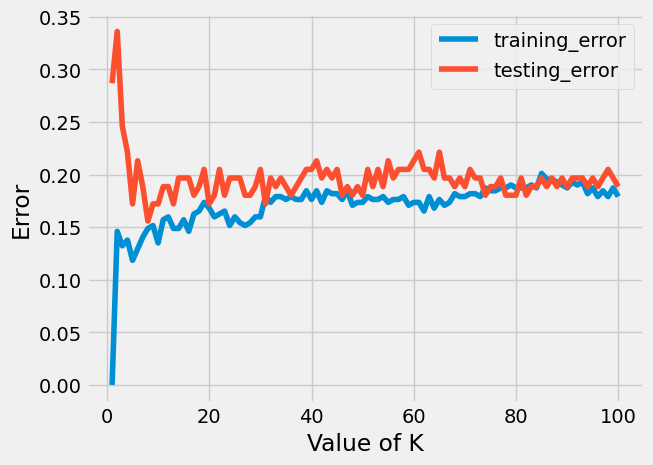

In [702]:
# Plotted a graph showing testing and training error

plt.style.use('fivethirtyeight')
column_dict = {'K': k_range, 'training_error': training_error, 'testing_error': testing_error}
column_df = pd.DataFrame(column_dict).set_index('K')

column_df.plot()
plt.xlabel('Value of K')
plt.ylabel('Error')

min(list(zip(testing_error, k_range)))

### Checked against null accuracy

In [703]:
knn = KNeighborsClassifier(n_neighbors= 8)
knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)
print((accuracy_score(y_test,y_pred_class)))

0.8442622950819673


In [704]:
# Feature Importance
feature_names = ['daysProfit', 'DaysBetterThanSP', 'closeDay179', 'netIncome', 'Year', 'MarketCap',
                 'employees_x', 'closeDay6', 'Market3MonthTrend', 'volumeDay0', 'Market6MonthTrend',
                 'MarketMonthTrend', 'closeDay0']
result = permutation_importance(knn, X_train, y_train, n_repeats=10, random_state=123)
feature_importance = pd.Series(result.importances_mean, index=feature_names).sort_values(ascending=False)
print(feature_importance)

daysProfit           0.144904
DaysBetterThanSP     0.025069
closeDay0            0.011019
closeDay6            0.010468
MarketCap            0.007438
closeDay179          0.003581
Year                 0.002204
Market6MonthTrend   -0.000275
Market3MonthTrend   -0.002204
volumeDay0          -0.003306
employees_x         -0.005785
MarketMonthTrend    -0.006887
netIncome           -0.007989
dtype: float64


In [705]:
# Calculated null accuracy
most_freq_class = y_train.value_counts().index[0]
y_test.value_counts()[most_freq_class]/len(y_test)

np.float64(0.5573770491803278)

0.84 > 0.56 accuracy

### Confusion Matrix

In [706]:
cm = confusion_matrix(y_test, y_pred_class)
print(cm)

[[43 11]
 [ 8 60]]


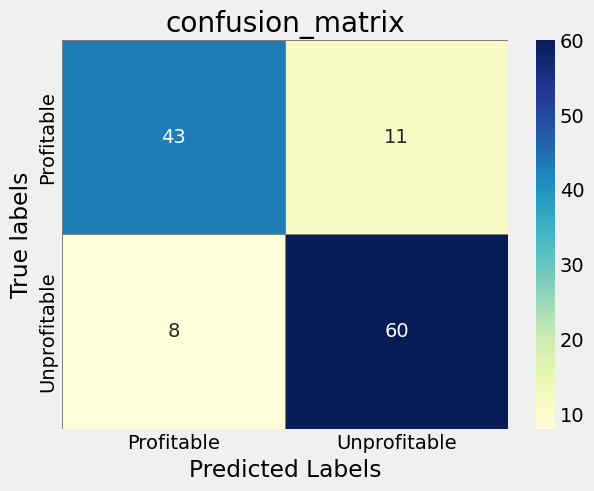

In [707]:
class_names = ['Profitable', 'Unprofitable']

sns.heatmap(cm, annot=True, cmap='YlGnBu',
            xticklabels=class_names, yticklabels=class_names,
            linewidths=0.5, linecolor='gray')

plt.title('confusion_matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True labels')
plt.show()

### Modification of KNN Model adjusting features

In [708]:
# Create pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('select', SelectKBest(score_func=f_classif)),
    ('knn', KNeighborsClassifier())
])

# Grid search over number of features (k) and KNN params
param_grid = {
    'select__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 'all'],
    'knn__n_neighbors': [8],
    'knn__weights': ['uniform', 'distance'],
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'knn__p': [1, 2],
    'knn__leaf_size': [5, 10, 15, 20, 25, 30]
}

grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X, y)

# Show results
print("Best number of features:", grid.best_params_['select__k'])
print("Best KNN parameters:", {k.replace("knn__", ""): v for k, v in grid.best_params_.items() if "knn__" in k})
print("Best CV accuracy:", grid.best_score_)


Best number of features: 9
Best KNN parameters: {'algorithm': 'auto', 'leaf_size': 5, 'n_neighbors': 8, 'p': 1, 'weights': 'uniform'}
Best CV accuracy: 0.8474226804123711


In [709]:
# Found which features gives the best accuracy
best_k = grid.best_params_['select__k']
selector = SelectKBest(score_func=f_classif, k=best_k)
selector.fit(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected features:", selected_features.tolist())

Selected features: ['daysProfit', 'DaysBetterThanSP', 'closeDay179', 'netIncome', 'Market3MonthTrend', 'volumeDay0', 'Market6MonthTrend', 'MarketMonthTrend', 'closeDay0']


### Replaced features

In [710]:
feature_cols2 = ['daysProfit', 'DaysBetterThanSP', 'closeDay179', 'netIncome', 'Market3MonthTrend', 'volumeDay0', 'Market6MonthTrend', 'MarketMonthTrend', 'closeDay0']

X = ipo_data[feature_cols2]
y = ipo_data.Profitable

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=123)
Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

In [711]:
# Trained model
knn = KNeighborsClassifier(n_neighbors= 8, algorithm='auto', leaf_size=5, p=1, weights='uniform')
knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)
print((accuracy_score(y_test,y_pred_class)))

0.7868852459016393


1st Model was selected as it has a better accuracy score

## 2. Decision Tree Classification Modelling
---

In [712]:
# Features added
X = ipo_data[feature_cols]
y = ipo_data.Profitable

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=123)
Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

In [713]:
# Model predicted
model = DecisionTreeClassifier(max_depth= 5, random_state= 123)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(acc)

0.8524590163934426


Confusion Matrix

In [714]:
cm = confusion_matrix(y_test, y_pred_class)
print(cm)

[[38 16]
 [10 58]]


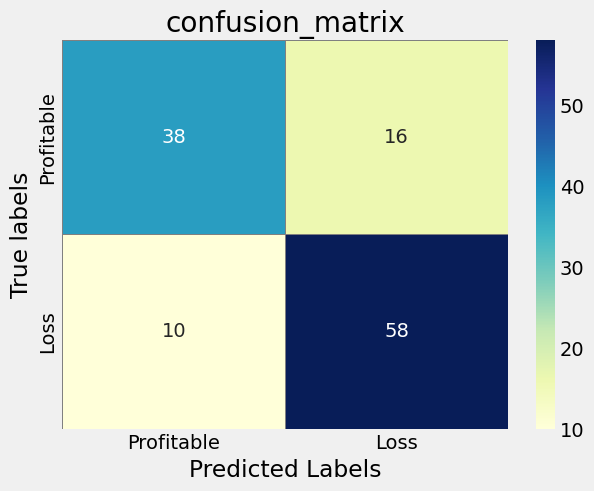

In [715]:
class_names = ['Profitable', 'Loss']

sns.heatmap(cm, annot=True, cmap='YlGnBu',
            xticklabels=class_names, yticklabels=class_names,
            linewidths=0.5, linecolor='gray')

plt.title('confusion_matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True labels')
plt.show()

In [716]:
# Used GridSearch and SelectKBest to find the most optimal input features
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('select', SelectKBest(score_func=f_classif)),
    ('dt', DecisionTreeClassifier(random_state=123))
])

# Grid search
param_grid = {
    'select__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 'all'],
    'dt__max_depth': [5, 10, 15, None],
    'dt__min_samples_split': [2, 10, 20],
    'dt__min_samples_leaf': [1, 5, 10],
    'dt__max_features': [None, 'sqrt', 'log2'],
    'dt__ccp_alpha': [0.0, 0.01, 0.1],
}

grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X, y)

print("Best Decision Tree Parameters:", grid.best_params_)
print("Best CV Accuracy:", round(grid.best_score_, 4))

Best Decision Tree Parameters: {'dt__ccp_alpha': 0.0, 'dt__max_depth': 5, 'dt__max_features': 'sqrt', 'dt__min_samples_leaf': 10, 'dt__min_samples_split': 2, 'select__k': 2}
Best CV Accuracy: 0.8392


In [717]:
# Got SelectKBest
selector = grid.best_estimator_.named_steps['select']
selected_features = X.columns[selector.get_support()]

print("Selected Features for Best Decision Tree:")
print(selected_features.tolist())

Selected Features for Best Decision Tree:
['daysProfit', 'DaysBetterThanSP']


### New Features chosen

In [718]:
feature_cols2 = ['daysProfit', 'DaysBetterThanSP']

X = ipo_data[feature_cols2]
y = ipo_data.Profitable

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=123)
Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)


In [719]:
model = DecisionTreeClassifier(max_depth= 5, random_state= 123, min_samples_leaf=10, ccp_alpha=0.0, max_features= 'sqrt', min_samples_split = 2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(acc)

0.8770491803278688


In [720]:
# Feature Importance
feature_names = ['daysProfit', 'DaysBetterThanSP']
X_train_df = pd.DataFrame(X_train, columns=feature_names)
feature_importance = pd.Series(model.feature_importances_, index=X_train_df.columns).sort_values(ascending=False)
print(feature_importance)

daysProfit          0.79686
DaysBetterThanSP    0.20314
dtype: float64


### Confusion Matrix

In [721]:
cm = confusion_matrix(y_test, y_pred_class)
print(cm)

[[38 16]
 [10 58]]


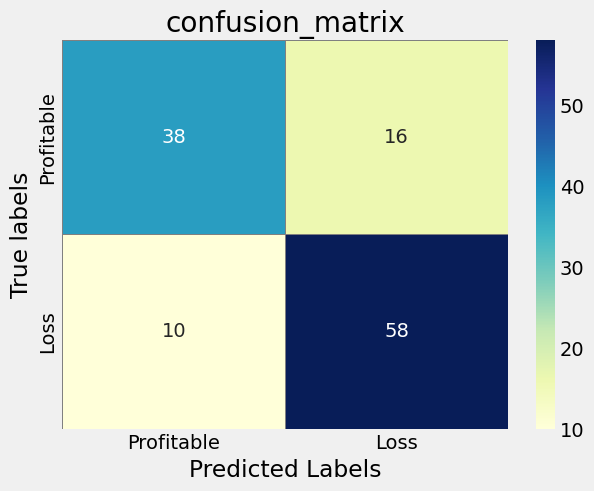

In [722]:
class_names = ['Profitable', 'Loss']

sns.heatmap(cm, annot=True, cmap='YlGnBu',
            xticklabels=class_names, yticklabels=class_names,
            linewidths=0.5, linecolor='gray')

plt.title('confusion_matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True labels')
plt.show()

## 3. Logistic Regression Classification Modelling
---

### Features Added

In [723]:
X = ipo_data[feature_cols]
y = ipo_data.Profitable

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=123)
Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

In [724]:
# Model loaded
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(acc)

0.8934426229508197


In [725]:
# Feature Importance
feature_names = ['daysProfit', 'DaysBetterThanSP', 'closeDay179', 'netIncome', 'Year',
                 'MarketCap', 'employees_x', 'closeDay6', 'Market3MonthTrend',
                 'volumeDay0', 'Market6MonthTrend', 'MarketMonthTrend', 'closeDay0']
X_train_df = pd.DataFrame(X_train, columns=feature_names)
importance = np.abs(logreg.coef_[0])
feature_importance = pd.Series(importance, index=X_train_df.columns).sort_values(ascending=False)

print(feature_importance)

daysProfit           1.470206
closeDay6            1.295600
DaysBetterThanSP     0.658048
closeDay179          0.557961
closeDay0            0.410486
netIncome            0.314902
MarketCap            0.191450
Year                 0.175671
Market6MonthTrend    0.147758
MarketMonthTrend     0.139165
Market3MonthTrend    0.094513
volumeDay0           0.073432
employees_x          0.051647
dtype: float64


### Confusion Matrix

In [726]:
cm = confusion_matrix(y_test, y_pred_class)
print(cm)

[[38 16]
 [10 58]]


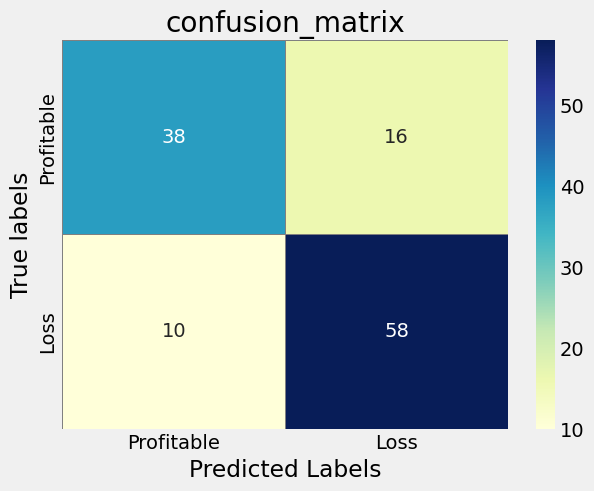

In [727]:
class_names = ['Profitable', 'Loss']

sns.heatmap(cm, annot=True, cmap='YlGnBu',
            xticklabels=class_names, yticklabels=class_names,
            linewidths=0.5, linecolor='gray')

plt.title('confusion_matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True labels')
plt.show()

### Found optimal inputs using grid

In [728]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)

Best parameters: {'C': 10, 'solver': 'liblinear'}


In [729]:
# Train new model with updated inputs
logreg = LogisticRegression(C=10, solver='liblinear')
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(acc)

0.8852459016393442


Logistic Regression model 1 has the highest accuracy